Clément Castellon - 3409249

# Préambule : régression linéaire, régression ridge et LASSO

Dans un premier temps, on initialise trois classifieurs binaires, dont on va comparer les performances sur la base de données USPS. Pour cela on doit trouver les valeurs du paramètre $\alpha$ optimales pour chacun.

In [227]:
%matplotlib notebook
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm_notebook
import importlib
import mltools as mlt
import numpy as np
import matplotlib.pyplot as plt
importlib.reload(mlt)
a = 10

def lasso_binairy_score(lasso, data_x, data_y):
    return (lasso.predict(data_x)* data_y > 0).mean()
    
accuracies = np.ones(shape=(10,10,3), dtype=float)

for i in tqdm_notebook(range(a)):
    for j in tqdm_notebook(range(a), leave = False):
        if i==j:
            continue
        train_X, train_Y, test_X, test_Y = mlt.init_USPS_1v1(i,j)

        mse = linear_model.LogisticRegression().fit(train_X, train_Y)
        ridge = linear_model.RidgeClassifier().fit(train_X, train_Y)
        lasso  = linear_model.Lasso( alpha = 1e-05).fit(train_X, train_Y)

        #mlt.show_usps(mse.coef_)
        #mlt.show_usps(ridge.coef_)
        #mlt.show_usps(lasso.coef_)

        accuracies[i,j,0] = mse.score(test_X, test_Y)
        accuracies[i,j,1] = ridge.score(test_X, test_Y)
        accuracies[i,j,2] = lasso_binairy_score(lasso,test_X, test_Y)



In [234]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV


tuned_parameters = {'alpha': np.linspace(1e-05, 10, 100)}
#tuned_parameters = {'alpha': [10 ** a for a in range(-6, -1)]}


for classifiers in ['hinge', 'log']:
    
    clf = GridSearchCV(SGDClassifier(loss=classifiers, penalty='l2',l1_ratio=0.15, shuffle=False, verbose=False, n_jobs=10, average=False, class_weight='balanced')
                      , tuned_parameters, scoring='f1_macro')

    #now clf is the best classifier found given the search space
    clf.fit(train_X, train_Y)
    #you can find the best alpha here
    print(clf.best_params_)    
    

clf = GridSearchCV(SGDClassifier(loss='log', penalty='l1',l1_ratio=0.15, shuffle=False, verbose=False, n_jobs=10, average=False, class_weight='balanced')
                      , tuned_parameters, cv=10, scoring='f1_macro')
clf.fit(train_X, train_Y)
print(clf.best_params_)    


{'alpha': 1e-05}
{'alpha': 1e-05}
{'alpha': 1e-05}


## Comparaison régression linéaire

<IPython.core.display.Javascript object>


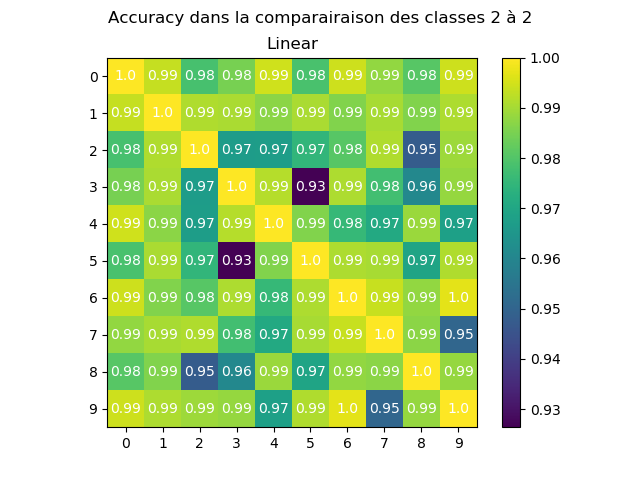

In [228]:
#######################
###PLOTTING ACCURACY###
#######################
fig, ax = plt.subplots()

ax.set_xticks(range(10))
ax.set_yticks(range(10))
ax.set_xticklabels(range(10))
ax.set_yticklabels(range(10))
    
im = ax.imshow(accuracies[:,:,0].reshape((10,10)),interpolation="nearest")
    
for j in range(10):
    for k in range(10):
        text = ax.text(k, j, round(accuracies[k, j, 0],2),ha="center", va="center", color="w")
ax.set_title("Linear")

fig.suptitle("Accuracy dans la comparairaison des classes 2 à 2")
fig.colorbar(im, ax=ax)
plt.show()


<IPython.core.display.Javascript object>


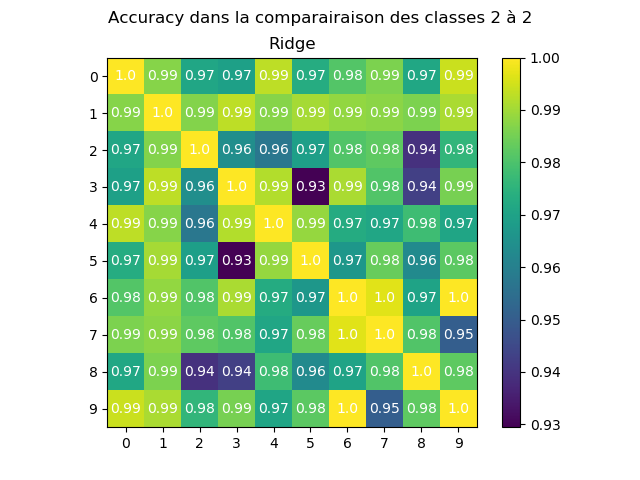

In [229]:
#######################
###PLOTTING ACCURACY###
#######################
fig, ax = plt.subplots()

ax.set_xticks(range(10))
ax.set_yticks(range(10))
ax.set_xticklabels(range(10))
ax.set_yticklabels(range(10))
    
im = ax.imshow(accuracies[:,:,1].reshape((10,10)),interpolation="nearest")
    
for j in range(10):
    for k in range(10):
        text = ax.text(k, j, round(accuracies[k, j, 1],2),ha="center", va="center", color="w")
ax.set_title("Ridge")

    
fig.suptitle("Accuracy dans la comparairaison des classes 2 à 2")
fig.colorbar(im, ax=ax)
plt.show()

<IPython.core.display.Javascript object>


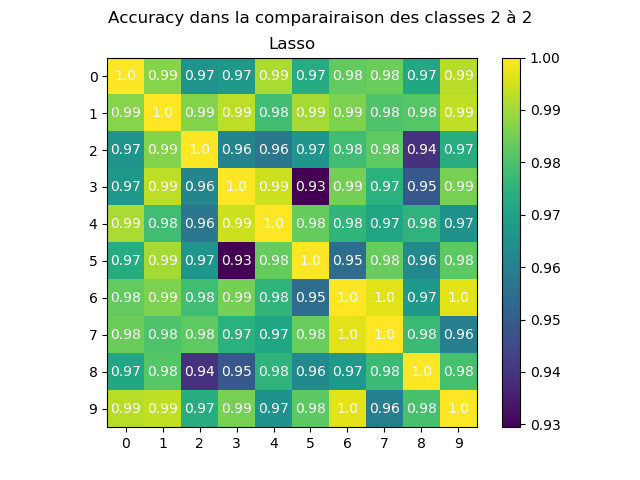

In [286]:
#######################
###PLOTTING ACCURACY###
#######################
fig, ax = plt.subplots()

ax.set_xticks(range(10))
ax.set_yticks(range(10))
ax.set_xticklabels(range(10))
ax.set_yticklabels(range(10))
    
im = ax.imshow(accuracies[:,:,2].reshape((10,10)),interpolation="nearest")
    
for j in range(10):
    for k in range(10):
        text = ax.text(k, j, round(accuracies[k, j, 2],2),ha="center", va="center", color="w")
ax.set_title("Lasso")

    
fig.suptitle("Accuracy dans la comparairaison des classes 2 à 2")
fig.colorbar(im, ax=ax)
plt.show()

# LASSO et Inpainting


<IPython.core.display.Javascript object>


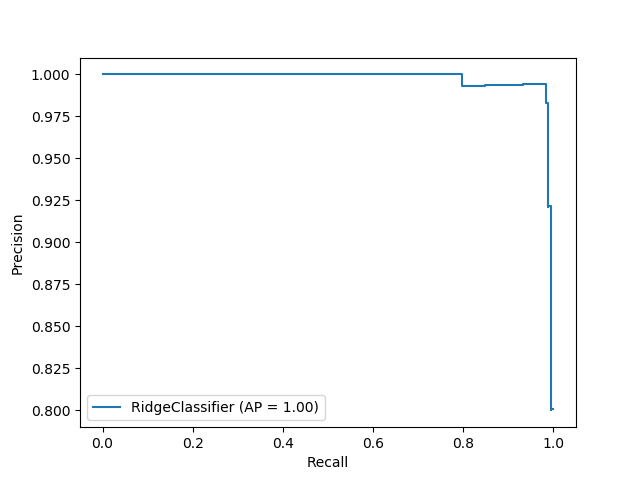

<IPython.core.display.Javascript object>


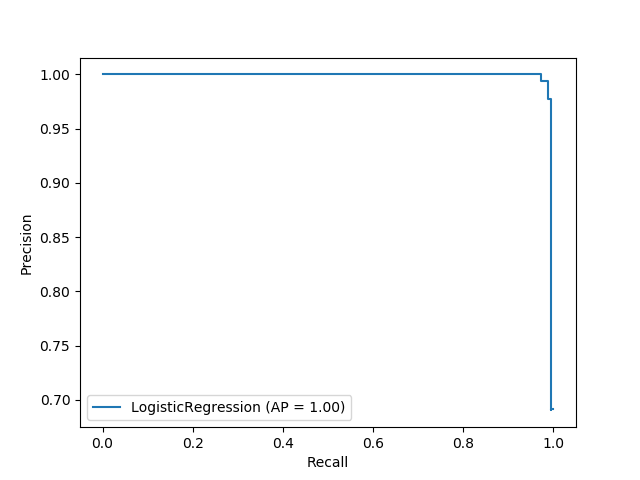

In [314]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve


svc_disp = plot_precision_recall_curve(ridge, test_X, test_Y)
svc_disp = plot_precision_recall_curve(mse, test_X, test_Y)


<IPython.core.display.Javascript object>


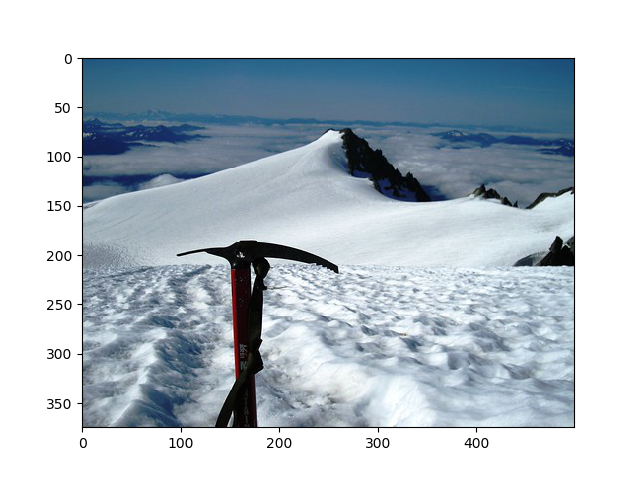

In [345]:
import mltools as mlt
importlib.reload(mlt)

pic = mlt.read_im("1.jpg")
mlt.display_im(pic)


<IPython.core.display.Javascript object>


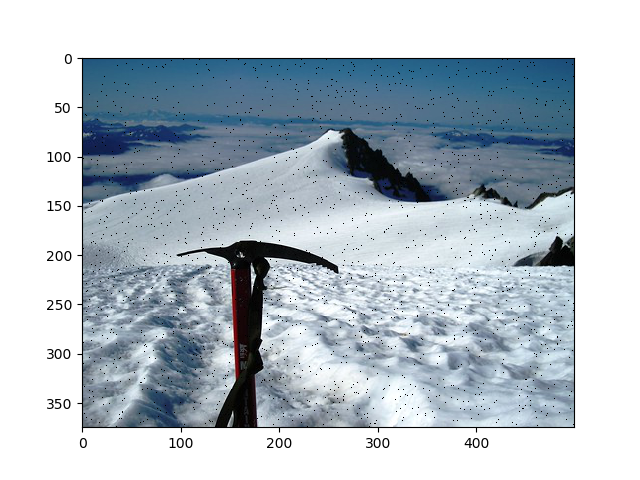

In [350]:
importlib.reload(mlt)

picnoisy = mlt.add_noise(pic,0.01)
mlt.display_im(picnoisy)
